In [1]:
import scipy as sp
import scipy.optimize as op
import numpy as np
import matplotlib.pyplot as plt
import emcee
from fittingfunctions import *

In [12]:
amp = 3.
mu = 320.
sigma = 5.
r = 60.
beta = 10.

p0 = np.array([amp,mu,sigma,r,beta])

Now I'll simulate the line at a range of x-positions:

In [13]:
x = np.arange(250,400,1) + 0.5
yvals = gf3(p0,x)

I've simulated the underlying model, but now I need to simulate the *measured* data, which means giving it some Poisson scatter:

In [14]:
ymeas = np.random.poisson(yvals)
#ymeas = np.array([0,0,1,0,2,0,1,1,0,1,1,2,0,3,1,2,0,2,3,2,6,7,6,6,7,6,9,10,9,4,6,3,9,3,6,3,4,3,5,4,2,0,3,1,0,0,1,0,0,1,0])
#x = np.arange(len(ymeas))

Let's plot it up and see how it looks:

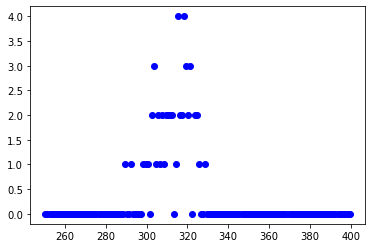

In [15]:
plt.subplot(111)
plt.scatter(x,ymeas,c='b')
#plt.plot(x,yvals,c='r')
plt.show()

---

[(0.0, None), (250.5, 399.5), (3, 20)]
Was the fit successful: True
b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
parameters:  [3.871489287426788, 317.63921357201275, 6.430003907505423, 60.0, 10.0]
errors:  [0.3820722839252181, 1.1023280243367597, 1.3241339712103561, 0.0, 0.0]
36.13220685552278
6.011007141529844


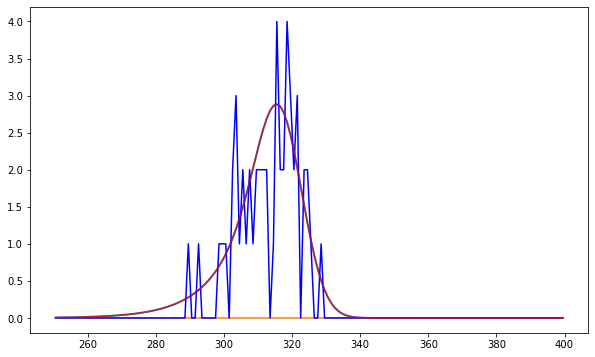

In [16]:
muarr = np.array([320.5])
#muarr = np.array(peak_positions)
FWHM = 20
si =0.3
ft = fit(x,ymeas,muarr,si,FWHM, rbfix = True,r = 60,beta = 10, posfix  = False, background = False, model = 'chi-squared')

[(0.0, None), (250.5, 399.5), (3, 20)]
Was the fit successful: True
b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
parameters:  [3.384537641322538, 319.37214513240195, 4.537461549969677, 60.0, 10.0]
errors:  [0.5036260895263543, 1.9085487098096974, 1.595443472418933, 0.0, 0.0]
52.09727590506708
7.217844269937325


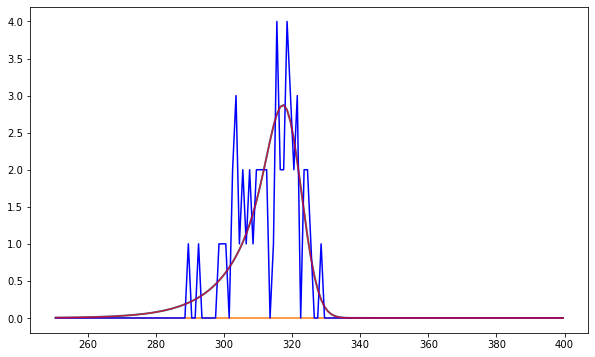

In [18]:
ft2 = fit(x,ymeas,muarr,si,FWHM, rbfix = True,r = 60,beta = 10, posfix  = False, background = False)

First off we're going to use direct optimisation using scipy. This requires the **negative** loglikelihood function, so we need to define that:

In [19]:
ad.printfit(ft,x,ymeas,endstop = False)

Fit complete. Fitted channels  250.5  to  399.5 , with  1  peak(s).
Width =  6 +- 1 
R =  60 +- 0 
Beta =  10 +- 0 
Background Offset 0 +- 0 
Reduced chi-squared =  0.15
    Positions           Yields              Heights
[1] 318 +- 1            63 +- 6             3.9 +- 0.4


/home/benjamin/Documents/Thesis/figs/autofit/adminfunctions.py:236: RuntimeWarning: divide by zero encountered in log10
  errormag =  int(np.floor(np.log10(error))) #sets the precision of the uncertainty on the error. Rounds down on the order of magnitude
/home/benjamin/Documents/Thesis/figs/autofit/adminfunctions.py:225: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fit[5].show()


In [20]:
ad.printfit(ft2,x,ymeas,endstop = False)

Fit complete. Fitted channels  250.5  to  399.5 , with  1  peak(s).
Width =  5 +- 2 
R =  60 +- 0 
Beta =  10 +- 0 
Background Offset 0 +- 0 
Reduced chi-squared =  0.12
    Positions           Yields              Heights
[1] 319 +- 2            52 +- 7             3.4 +- 0.5


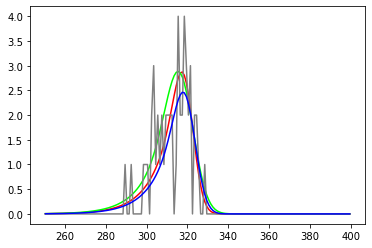

In [22]:
#plt.figure(figsize = (15,15))
plt.plot(x,ft2[0],'r')
plt.plot(x, ft[0],'lime')
plt.plot(x,ymeas,color = 'grey')
#plt.errorbar(x,ymeas,np.sqrt(ymeas + 1), color = 'grey')
plt.plot(x,yvals,'b')